# Environment that selects time series from a repo
## Use default state and reward design function
This is a source code file describing the environment that selects a time series with lablled anomalies from a repository. The repository contains a list of time series that are lablled with anomalies.

Currently, the repoistory used is from Yahoo benchmark dataset, which contains 4 lists of datasets, each of which has more than 50 one-dimensional time series datasets. The repository is provided under the folder "time_series_repo".

The state design function, i.e, the state of the environment, is to return the time series value in a specific time step.

And the reward design function is to return 1 if the action of reporting anomaly is correct, 0 otherwise.

Check time_series_repo.py for a more complete version of the environment, which accepts a state design function and a reward design function as inputs.

## Purpose
This file provides an interface for the reinformcement learning algorithm to communication with the environment. It provides several functions:

### 1. state = env.reset()
reset() function: It selects a time series dataset from the repository and return the first data element in the time series as the current state of the environment.

### 2. next_state, reward, done, other = env.step(action)
step() function: It accepts an action as the input. The action indicates whether the anomaly detector considers the previous state as an anomalous state. And it returns several items.

The returned next_state is the next data element in the corresponding time series dataset.

The returned reward is designed to reflect the correctness of the anomaly detector. In other words, if the anomaly detector responses correctly to the anomalous state, then the reward would be positive, otherwise negative.

The returned done is a flag indicating whether the time series dataset has ended.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import random
import os

import sklearn.preprocessing

In [ ]:
NOT_ANOMALY = 0
ANOMALY = 1

REWARD_CORRECT = 1
REWARD_INCORRECT = -1

action_space = [NOT_ANOMALY, ANOMALY]

0


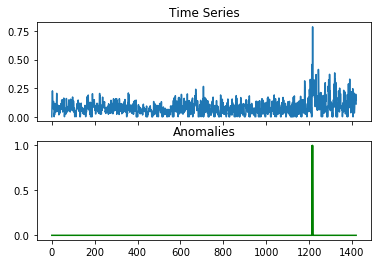

1


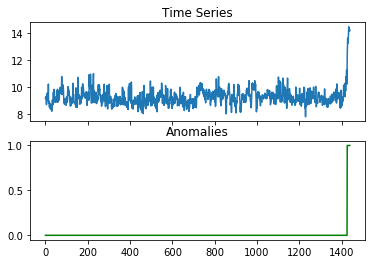

2


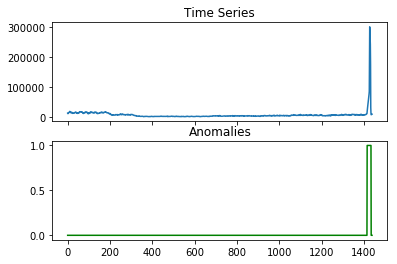

3


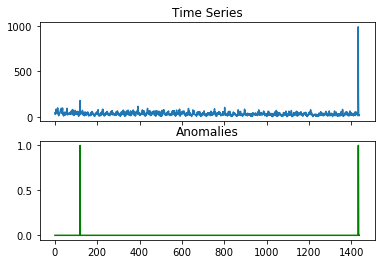

4


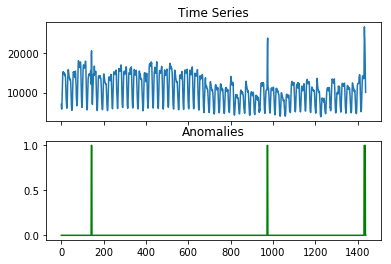

5


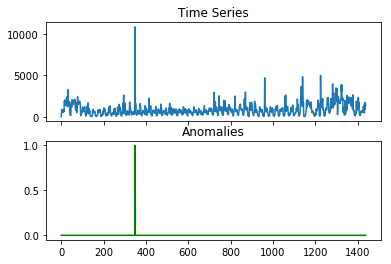

6


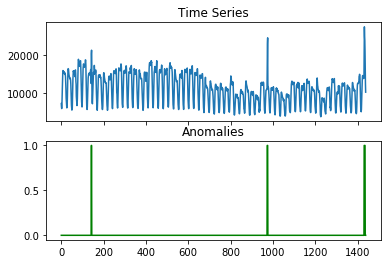

7


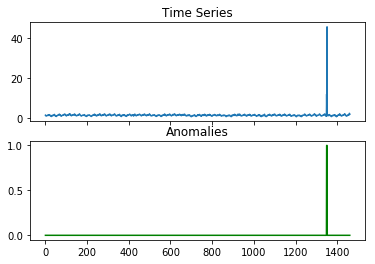

8


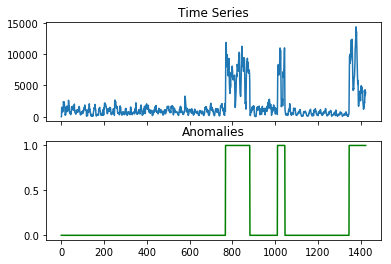

9


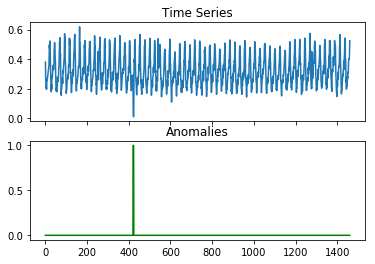

10


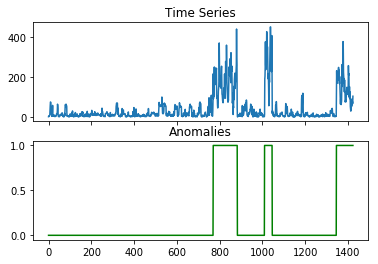

11


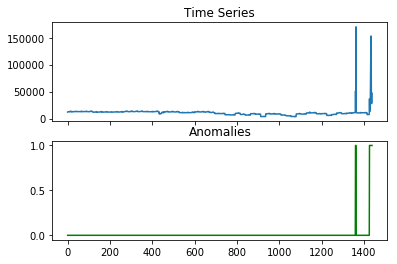

12


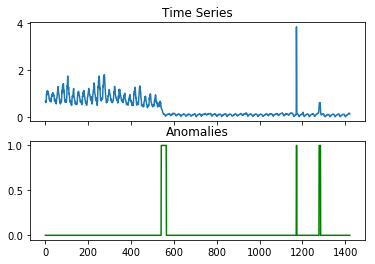

13


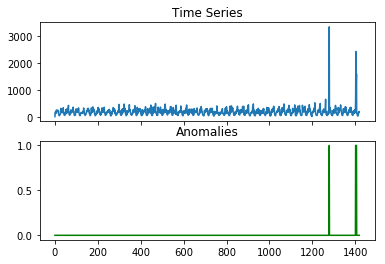

14


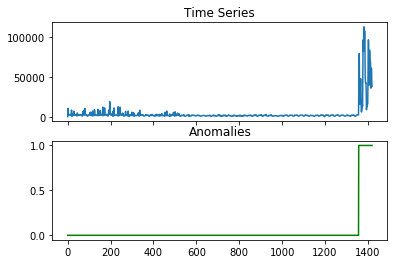

15


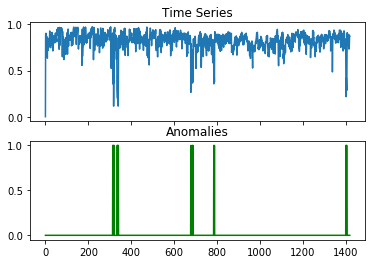

16


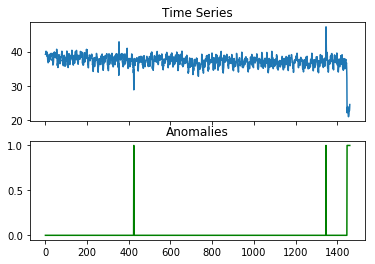

17


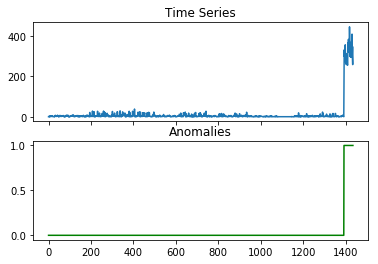

18


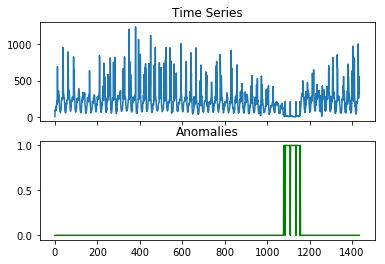

19


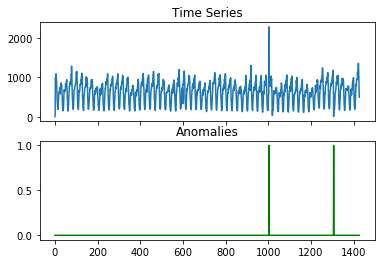

20


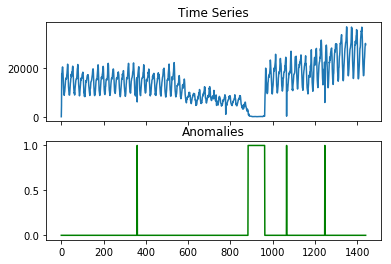

21


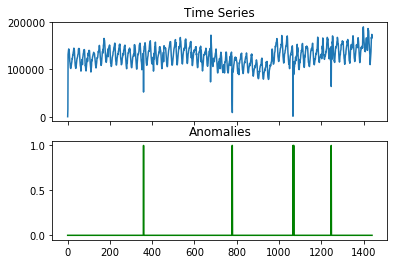

22


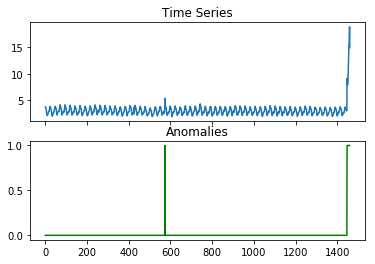

23


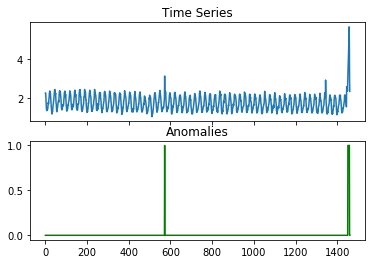

24


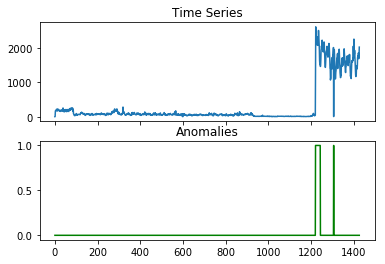

25


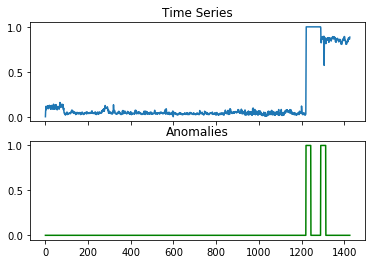

26


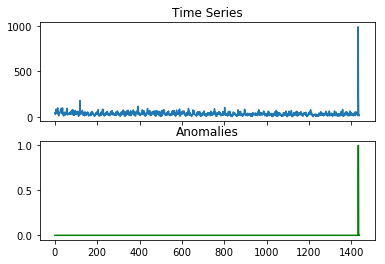

27


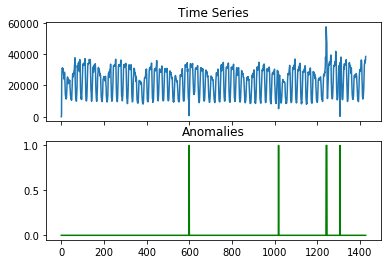

28


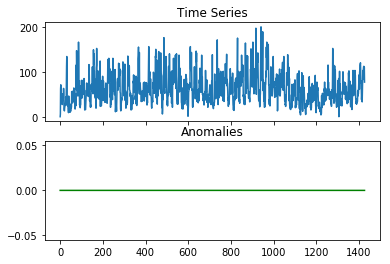

29


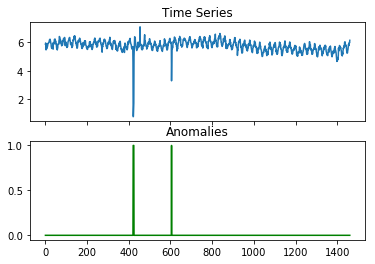

30


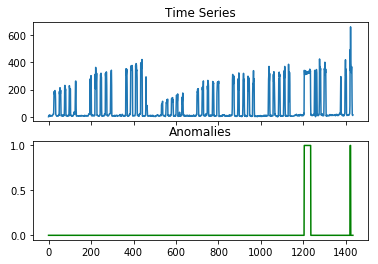

31


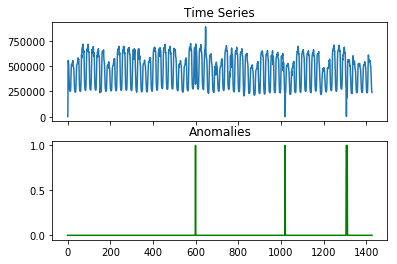

32


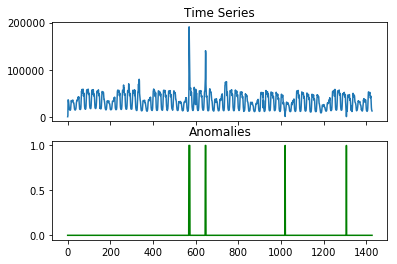

33


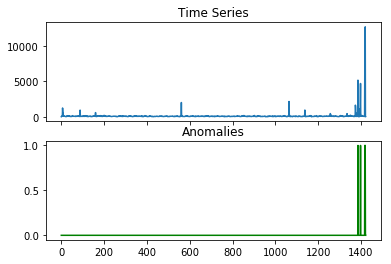

34


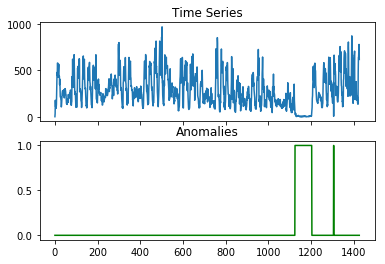

35


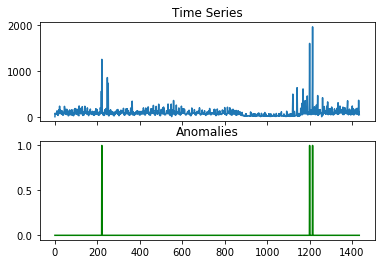

36


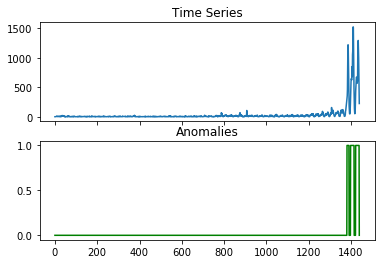

37


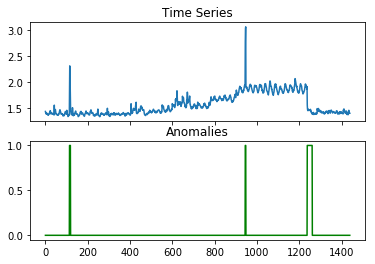

38


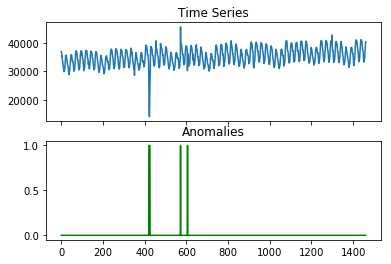

39


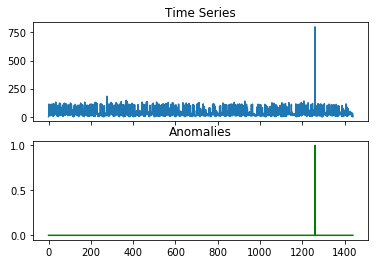

40


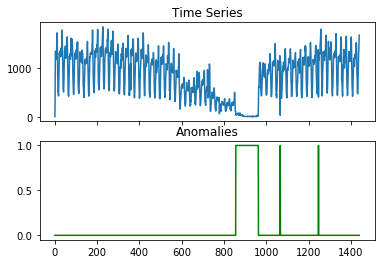

41


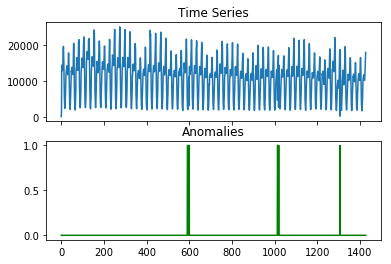

42


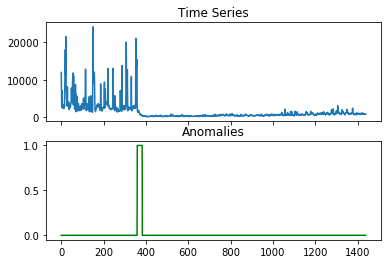

43


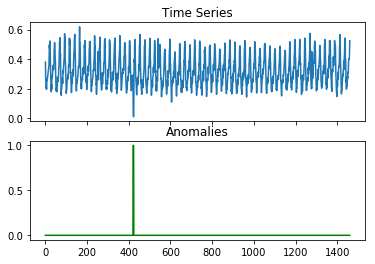

44


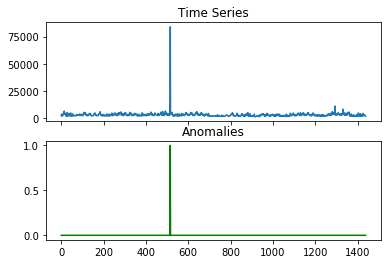

45


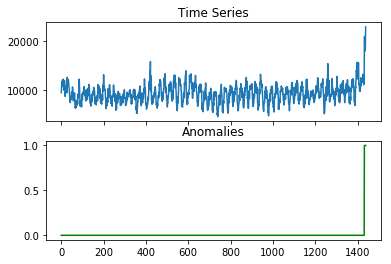

46


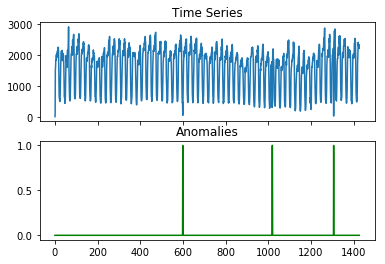

47


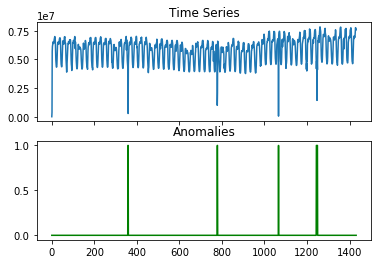

48


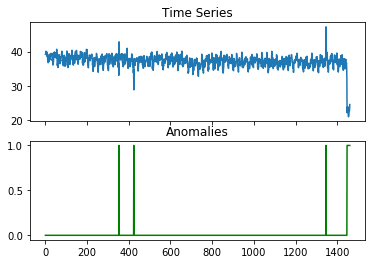

49


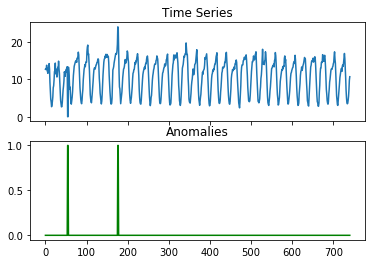

50


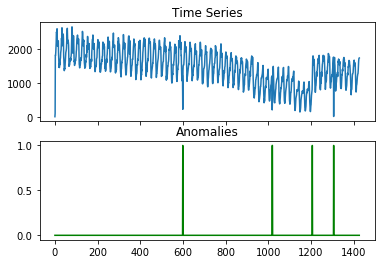

51


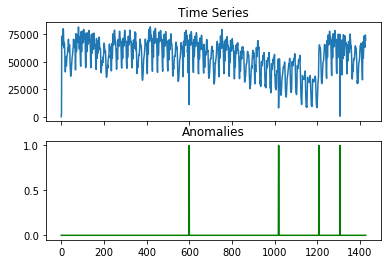

52


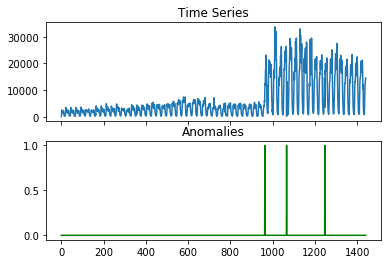

53


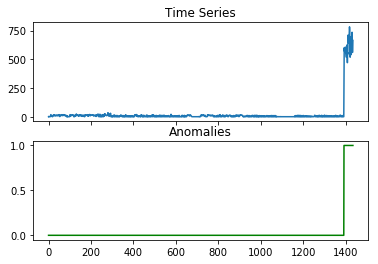

54


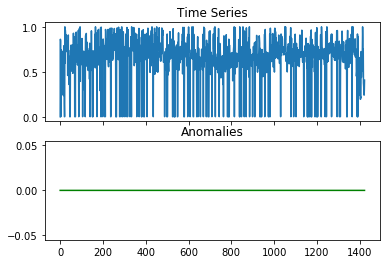

55


KeyboardInterrupt: 

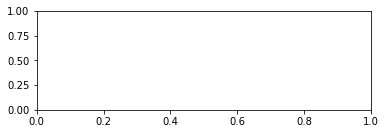

In [3]:
# get all the path of the csv files to be loaded 
repodir = '../env/time_series_repo/A1Benchmark'
repodirext = []

for subdir, dirs, files in os.walk(repodir):
    for file in files:
        if file.find('.csv') != -1:
            repodirext.append(os.path.join(subdir, file))

# each csv file is read as the following, therefore contains three columns (A1/2/3/4Benchmark):
# - timestamp
# - value
# - anomaly
for i in range(len(repodirext)):
    timeseries = pd.read_csv(repodirext[i],
                             usecols=[0,1,2], header=0, names=['timestamp','value','anomaly'])

    # Plot the result for each episode
    print i
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(timeseries['value'])
    axarr[0].set_title('Time Series')
    axarr[1].plot(timeseries['anomaly'], color='g')
    axarr[1].set_title('Anomalies')
    plt.show()

0


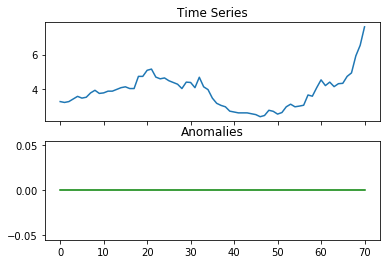

1


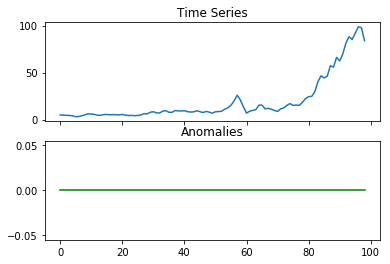

2


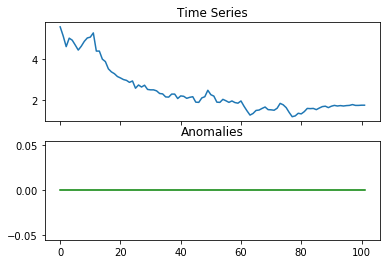

3


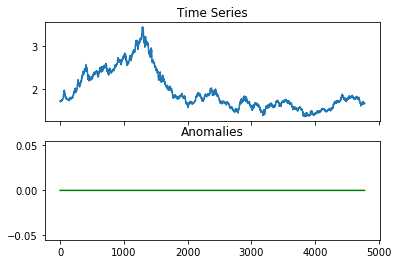

4


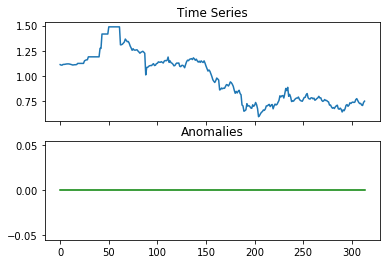

5


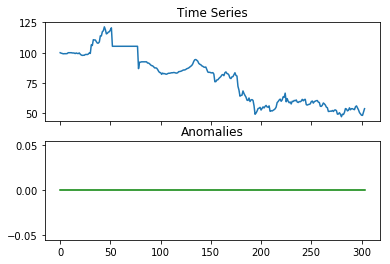

6


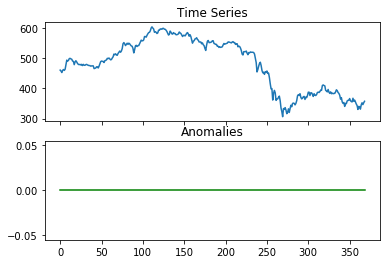

7


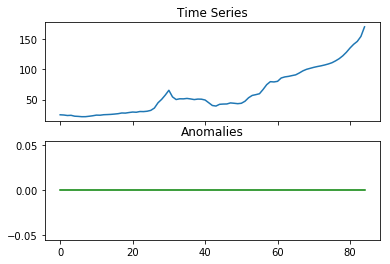

8


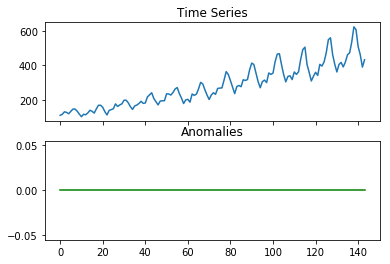

9


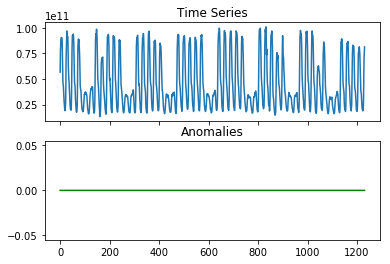

10


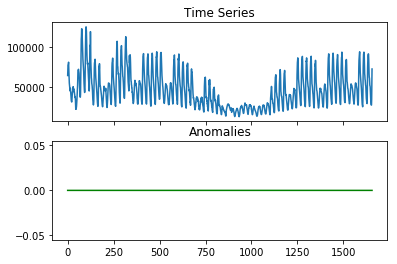

11


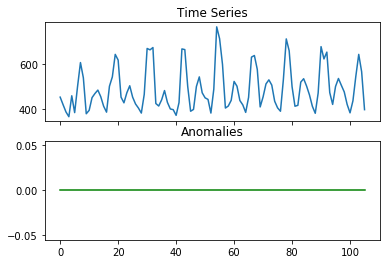

12


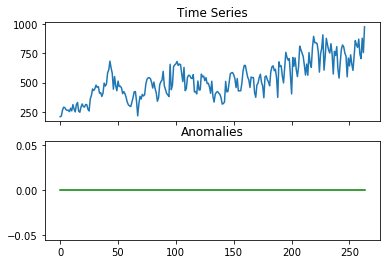

13


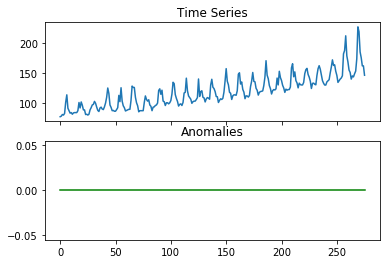

14


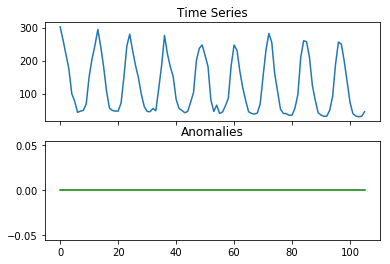

15


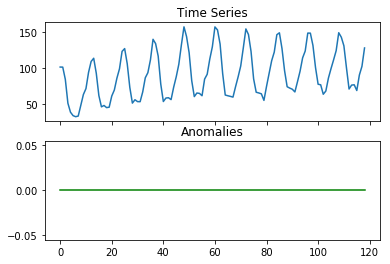

16


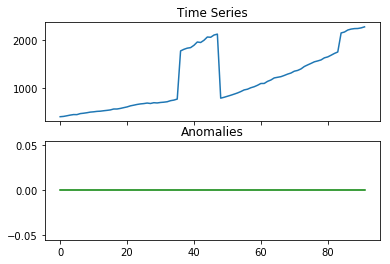

17


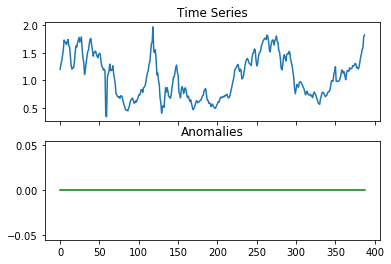

18


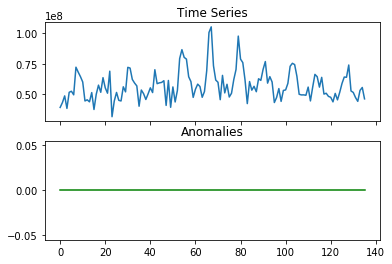

19


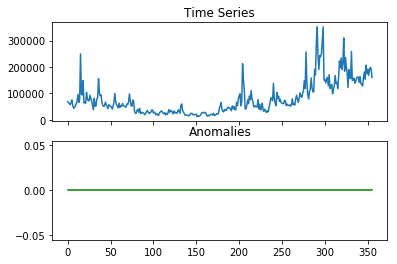

20


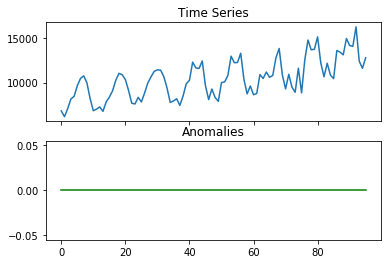

21


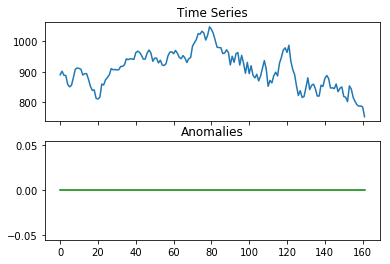

In [14]:
# get all the path of the csv files to be loaded 
repodir = '../env/time_series_repo/DataMarket'
repodirext = []

for subdir, dirs, files in os.walk(repodir):
    for file in files:
        if file.find('.csv') != -1:
            repodirext.append(os.path.join(subdir, file))

# each csv file is read as the following, therefore contains two columns:
# - timestamp
# - value
for i in range(len(repodirext)):
    timeseries = pd.read_csv(repodirext[i],
                             usecols=[0,1], header=0, skipfooter=2, names=['timestamp','value'], engine='python')

    timeseries['anomaly'] = pd.Series(np.zeros(len(timeseries['timestamp'])), index=timeseries.index)
    # Plot the result for each episode
    print i
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(timeseries['value'])
    axarr[0].set_title('Time Series')
    axarr[1].plot(timeseries['anomaly'], color='g')
    axarr[1].set_title('Anomalies')
    plt.show()

## The Original Version of Env

In [ ]:
class EnvTimeSeriesfromRepo():
    # init the class instance
    def __init__(self):
        self.action_space_n = len(action_space)
        self.timeseries_curser = 0
    
    # reset the instance
    def reset(self):
        # 1. select a new time series from the repo and load
        # the time series contains "timestamp", "value", "anomaly"
        self.timeseries = pd.read_csv(repodirext[random.randint(0, len(repodirext)-1)],
                                     usecols=[0,1,2], header=0, names=['timestamp','value','anomaly'])
        self.timeseries_curser = 0
        
        # 2. return the first state, containing the first element of the time series
        return self.timeseries['value'][self.timeseries_curser]
        
    # take a step and gain a reward
    def step(self, action):
        assert(action in action_space)
        
        # 1. get the reward of the action
        if action == self.timeseries['anomaly'][self.timeseries_curser]:
            reward = REWARD_CORRECT
        else:
            reward = REWARD_INCORRECT
        
        # 2. get the next state and the done flag after the action
        self.timeseries_curser += 1
        
        if self.timeseries_curser >= self.timeseries['value'].size:
            done = 1
            state = []
        else:
            done = 0
            state = self.timeseries['value'][self.timeseries_curser]
            
        return state, reward, done, []